In [87]:
#dependecies
import pandas as pd

import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

import matplotlib.pyplot as plt
import numpy as np

In [88]:
# reflect database into ORM classes
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [89]:
#map classes
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [90]:
#create session
session = Session(engine)

In [91]:
#Precipitation Analysis
query = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).\
    order_by(Measurement.id.desc()).limit(365).all()

In [92]:
precip = pd.DataFrame(query, columns=['Date', 'Precipitation'])
precip = precip.sort_index(ascending=False)
precip = precip.reset_index()
precip = precip.drop("index", 1)
precip.head()

,Date,Precipitation
0,2016-08-07,26.72
1,2016-08-08,5.28
2,2016-08-09,4.72
3,2016-08-10,0.00
4,2016-08-11,0.72


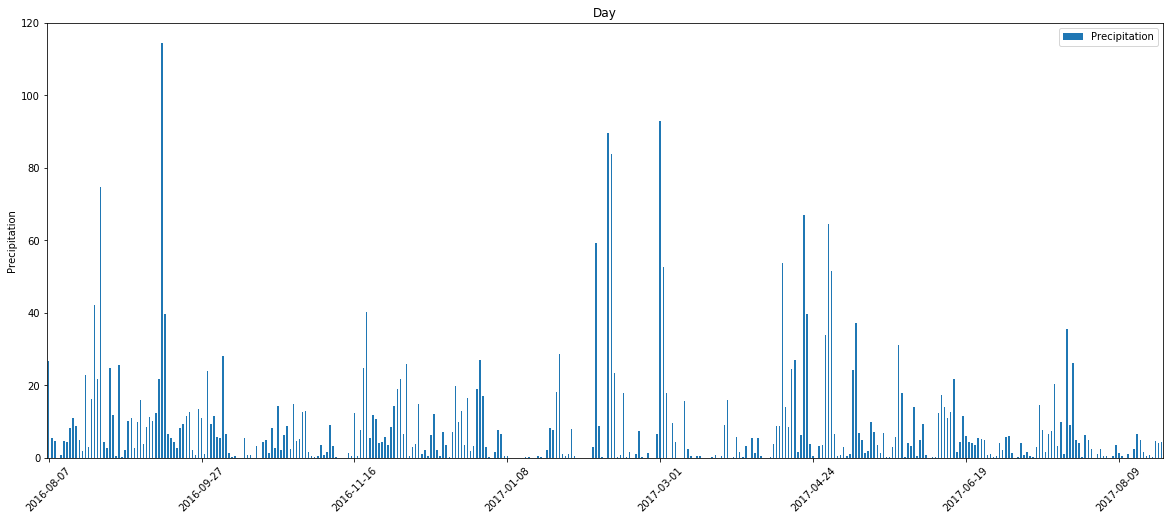

In [93]:
# plot date prcp values
precip.plot(kind="bar", figsize=(20,8))
plt.xticks(ticks, date_tick, rotation=45)
plt.title("Day")
plt.ylabel("Precipitation")
plt.show()

In [94]:
# station analysis
Station_Count = session.query(func.count(Station.id)).all()
Station_Count

[(63)]

In [95]:
# most active station
Station_Activity = session.query(Station.station, Station.name, func.count(Measurement.date)). \
    filter(Station.station == Measurement.station).\
    group_by(Station.name).order_by(func.count(Measurement.date).desc()).all()

Station_Activity

[('USC00519281', 'WAIHEE 837.5, HI US', 155232),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 152544),
 ('USC00513117', 'KANEOHE 838.1, HI US', 151704),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 149464),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 146272),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 123312),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 110824),
 ('USC00517948', 'PEARL CITY, HI US', 76832),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 28616)]

In [96]:
high_tobs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == "USC00519281").limit(365).all()

In [97]:
# create df
tobs = pd.DataFrame(high_tobs, columns=["Date", "Temp Obs"])

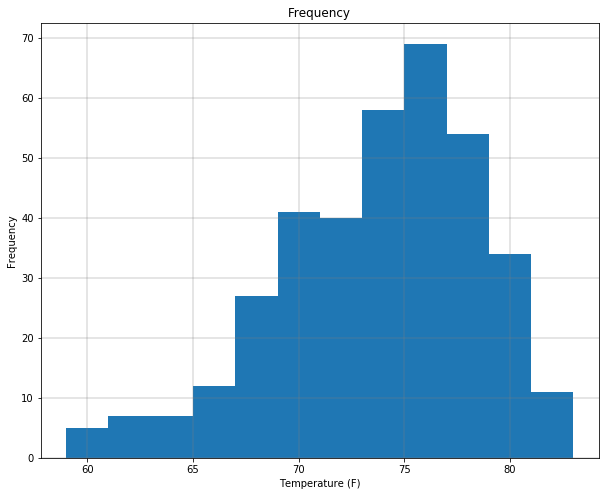

In [98]:
#plot station analysis
plt.figure(figsize=(10,8))
plt.hist(tobs["Temp Obs"], bins=12)
plt.grid(color='grey', linestyle='-', linewidth=2, alpha=.2)
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Frequency")
plt.show()

In [61]:
#temperature analysis